In [4]:
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import torch.nn as nn

train_data = datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False)

class MLP_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.submodel_1 = nn.Linear(784,500)
        self.submodel_2 = nn.Linear(500,10)
    
    def forward(self,x):
        z = F.relu(self.submodel_1(x))
        y = F.relu(self.submodel_2(z))
        return y

model = MLP_Model()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    x = images.view(-1,784)
    y = model.forward(x)
    loss = F.cross_entropy(y,labels)
    loss.backward()
    optimizer.step()

correct = 0
n = len(test_data)

for images,labels in tqdm(test_loader):
    for image,label in zip(images,labels):
        x = image.view(-1,784)
        y = model.forward(x)
        prediction = torch.argmax(y,dim=1)
        if(prediction == label):
            correct=correct+1

print(f"Accuracy= {(correct/n)*100}%")



  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Accuracy= 95.78999999999999%


true lable: 3


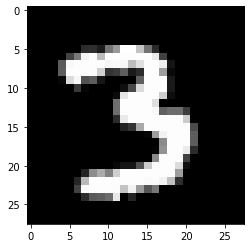

In [52]:
import matplotlib.pyplot as plt

im,lb = test_data[50]
im = im.reshape([28,28])
plt.imshow(im, cmap='gray')
print("true lable: {}".format(lb))

In [53]:
x = im.view(-1,784)
y = model(x)
prediction = torch.argmax(y,dim=1)
print("predicted label: {}".format(prediction))

predicted label: tensor([3])
